Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.14      0.24       194
           1       0.89      0.99      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.83      0.57      0.59      1600
weighted avg       0.88      0.89      0.86      1600


Confusion Matrix:
 [[  27  167]
 [   8 1398]]


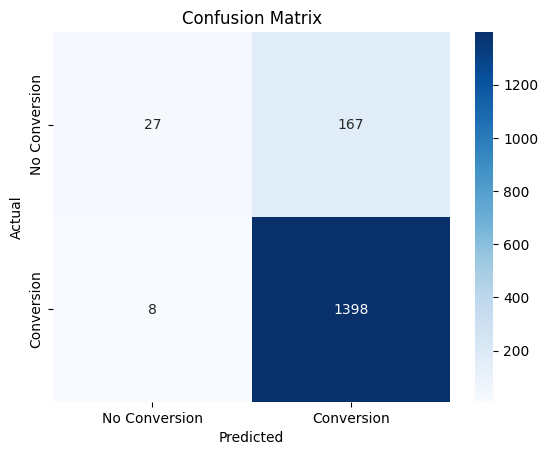


Feature Importance:
                 Feature  Importance
9         PagesPerVisit    0.090174
5               AdSpend    0.089333
6      ClickThroughRate    0.088255
10           TimeOnSite    0.087177
7        ConversionRate    0.086831
15        LoyaltyPoints    0.084924
8         WebsiteVisits    0.070840
12           EmailOpens    0.069533
14    PreviousPurchases    0.060062
2                Income    0.059113
13          EmailClicks    0.056327
11         SocialShares    0.051105
0                   Age    0.048179
4          CampaignType    0.025430
3       CampaignChannel    0.023906
1                Gender    0.008810
16  AdvertisingPlatform    0.000000
17      AdvertisingTool    0.000000


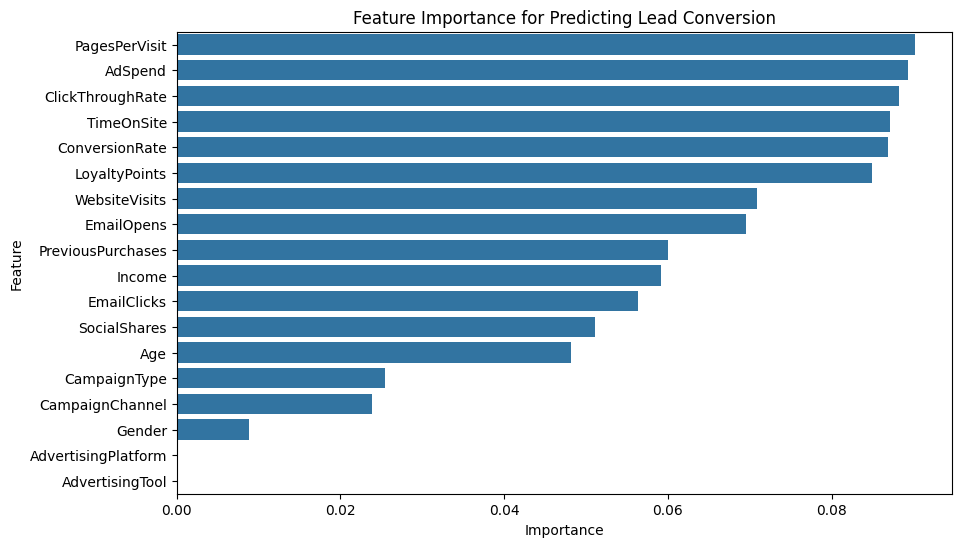

Conversion Rate for Funnel A: 29.98%
Conversion Rate for Funnel B: 34.77%

T-statistic: -4.5782
P-value: 0.0000


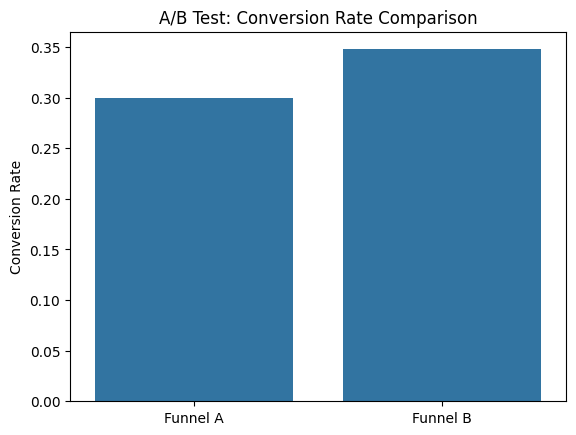

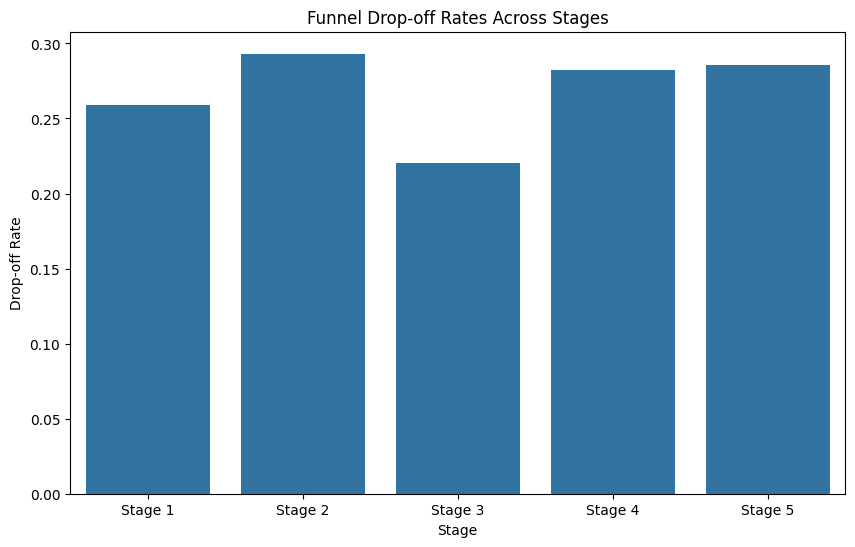

Overall Conversion Rate: 20.94%


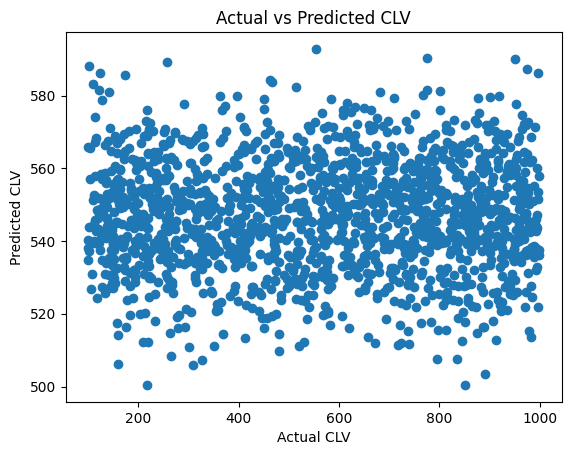

Top 5 Leads with Highest Predicted CLV:
      Actual CLV  Predicted CLV
6279  554.973130     592.817784
1606  774.613161     590.339868
4267  950.710558     590.015114
2680  256.370353     589.179452
4789  102.211904     587.991964


In [1]:
"""
Key Modifications for Your Dataset:
Dataset Loading:

The dataset is loaded from the CSV file satyam_digital_marketing_campaign_dataset.csv.

The CustomerID column is dropped as it is not relevant for modeling.

Feature Encoding:

Categorical features like Gender, CampaignChannel, CampaignType, AdvertisingPlatform, and AdvertisingTool are encoded using LabelEncoder.

Model Training:

A Random Forest Classifier is trained to predict the Conversion column.

A/B Testing:

A new column Funnel Variant is added to simulate A/B testing.

Conversion rates for two funnel variations (A and B) are calculated and compared.

Bottleneck Identification:

A simulated funnel with 5 stages is created to visualize drop-off rates.

CLV Prediction:

A synthetic CLV column is added, and a Linear Regression model is trained to predict CLV.

Expected Outputs:
Classification Report: Accuracy, precision, recall, and F1-score for the lead conversion model.

Confusion Matrix: Visual representation of the model’s performance.

A/B Testing Results: Conversion rates for two funnel variations and statistical significance.

Bottleneck Analysis: Drop-off rates at each funnel stage and overall conversion rate.

CLV Prediction: Visualization of predicted vs. actual CLV and identification of top leads with high CLV.

"""


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Step 1: Load the dataset
file_path = "satyam_digital_marketing_campaign_dataset.csv"
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Encode categorical features
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['CampaignChannel'] = le.fit_transform(data['CampaignChannel'])
data['CampaignType'] = le.fit_transform(data['CampaignType'])
data['AdvertisingPlatform'] = le.fit_transform(data['AdvertisingPlatform'])
data['AdvertisingTool'] = le.fit_transform(data['AdvertisingTool'])

# Drop unnecessary columns (e.g., CustomerID)
data = data.drop(columns=['CustomerID'])

# Split the data into features and target
X = data.drop('Conversion', axis=1)
y = data['Conversion']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Conversion', 'Conversion'], yticklabels=['No Conversion', 'Conversion'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Feature Importance (for lead scoring)
feature_importances = model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_df)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance for Predicting Lead Conversion')
plt.show()

# Step 6: A/B Testing Simulation
# Simulate A/B Testing
# We'll assume that 50% of leads are exposed to A, and 50% to B
# We will add a new column `Funnel Variant` to simulate the variations.

# Assign leads to A or B
data['Funnel Variant'] = np.random.choice(['A', 'B'], size=len(data))

# Simulate a difference in conversion rates between A and B
# Assume the conversion rate for A is 30%, and for B it is 35%
data['Conversion A/B Test'] = data.apply(
    lambda row: 1 if row['Funnel Variant'] == 'B' and np.random.rand() < 0.35 else
                (1 if row['Funnel Variant'] == 'A' and np.random.rand() < 0.3 else 0),
    axis=1
)

# Split the data based on Funnel Variant
data_A = data[data['Funnel Variant'] == 'A']
data_B = data[data['Funnel Variant'] == 'B']

# Calculate conversion rates for both A and B
conversion_rate_A = data_A['Conversion A/B Test'].mean()
conversion_rate_B = data_B['Conversion A/B Test'].mean()

# Print the results
print(f"Conversion Rate for Funnel A: {conversion_rate_A * 100:.2f}%")
print(f"Conversion Rate for Funnel B: {conversion_rate_B * 100:.2f}%")

# Perform a t-test to see if the difference is statistically significant
t_stat, p_value = stats.ttest_ind(data_A['Conversion A/B Test'], data_B['Conversion A/B Test'])
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot the conversion rates for A and B
sns.barplot(x=['Funnel A', 'Funnel B'], y=[conversion_rate_A, conversion_rate_B])
plt.ylabel('Conversion Rate')
plt.title('A/B Test: Conversion Rate Comparison')
plt.show()

# Step 7: Bottleneck Identification in the Funnel
# Simulating stages in the funnel
n_stages = 5  # e.g., 5 stages of the funnel

# Simulate drop-off rates at each stage
drop_offs = np.random.uniform(0.1, 0.3, size=n_stages)  # random drop-offs between 10% and 30%

# Create a DataFrame to simulate funnel stages
funnel_data = {
    'Stage': [f'Stage {i+1}' for i in range(n_stages)],
    'Drop-off Rate': drop_offs
}
funnel_df = pd.DataFrame(funnel_data)

# Visualize funnel stages with drop-off rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Stage', y='Drop-off Rate', data=funnel_df)
plt.title('Funnel Drop-off Rates Across Stages')
plt.ylabel('Drop-off Rate')
plt.show()

# Calculate the overall conversion rate by taking into account the drop-offs
overall_conversion_rate = np.prod(1 - drop_offs)  # Assuming leads drop off at each stage
print(f"Overall Conversion Rate: {overall_conversion_rate * 100:.2f}%")

# Step 8: Marketing Spend Optimization using CLV
# Simulate Customer Lifetime Value (CLV) based on features
data['CLV'] = np.random.uniform(100, 1000, size=len(data))  # Random CLV values between 100 and 1000

# Select features for CLV prediction
X_clv = data.drop(columns=['Conversion', 'CLV', 'Funnel Variant'])
y_clv = data['CLV']

# Split the data for CLV prediction
X_train_clv, X_test_clv, y_train_clv, y_test_clv = train_test_split(X_clv, y_clv, test_size=0.2, random_state=42)

# Train a Linear Regression model to predict CLV
clv_model = LinearRegression()
clv_model.fit(X_train_clv, y_train_clv)

# Predict CLV on test data
predicted_clv = clv_model.predict(X_test_clv)

# Display the predicted vs actual CLV
plt.scatter(y_test_clv, predicted_clv)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted CLV')
plt.show()

# Identify leads with the highest predicted CLV
top_clv_leads = pd.DataFrame({'Actual CLV': y_test_clv, 'Predicted CLV': predicted_clv})
top_clv_leads_sorted = top_clv_leads.sort_values(by='Predicted CLV', ascending=False)
print(f"Top 5 Leads with Highest Predicted CLV:\n{top_clv_leads_sorted.head()}")